# **Global Mental Health Analysis**

**Created By: Preksha Shah**

**Date: 09.03.2024**

---



# **Import the libraries**

---



In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Load the dataset**

---



In [ ]:
# Step 2: Load the dataset
df = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")


# **Data exploration**

---



In [ ]:
# Step 3: Data Exploration
print("Data Exploration:")
df.head()  # Display the first few rows of the dataset


Data Exploration:


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
df.info()   # Display information about the dataset, including data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

# **Univariate Analysis**

---



In [ ]:
# Step 4: Univariate Analysis

# a. Calculate basic descriptive statistics
print("Basic Descriptive Statistics:")
df.describe()

Basic Descriptive Statistics:


,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [ ]:
import plotly.express as px

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create a separate histogram for each numerical variable
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title='Share of Population', yaxis_title='Frequency')
    fig.show()


In [ ]:
import plotly.figure_factory as ff

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create a separate kernel density plot for each numerical variable
for col in numerical_cols:
    fig = ff.create_distplot([df[col]], [col], bin_size=0.25, show_rug=False)
    fig.update_layout(title=f'Kernel Density Plot of {col}', xaxis_title='Value', yaxis_title='Density')
    fig.show()


In [ ]:
import plotly.express as px

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create a separate box plot for each numerical variable
for col in numerical_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}')
    fig.update_layout(yaxis_title='Value')
    fig.show()


In [ ]:
# Step 1: Display frequency tables showing counts and percentages for categorical variables
# Let's assume 'Entity' and 'Code' are the categorical variables in this case
categorical_cols = ['Entity', 'Code']

for col in categorical_cols:
    print(f"Frequency table for {col}:")
    print(df[col].value_counts())
    print("\nPercentage table for {col}:")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")



Frequency table for Entity:
Afghanistan    30
Netherlands    30
Nicaragua      30
Niger          30
Nigeria        30
               ..
Ghana          30
Greece         30
Greenland      30
Grenada        30
Zimbabwe       30
Name: Entity, Length: 214, dtype: int64

Percentage table for {col}:
Afghanistan    0.46729
Netherlands    0.46729
Nicaragua      0.46729
Niger          0.46729
Nigeria        0.46729
                ...   
Ghana          0.46729
Greece         0.46729
Greenland      0.46729
Grenada        0.46729
Zimbabwe       0.46729
Name: Entity, Length: 214, dtype: float64


Frequency table for Code:
AFG    30
PNG    30
NIU    30
PRK    30
MKD    30
       ..
GRL    30
GRD    30
GUM    30
GTM    30
ZWE    30
Name: Code, Length: 205, dtype: int64

Percentage table for {col}:
AFG    0.487805
PNG    0.487805
NIU    0.487805
PRK    0.487805
MKD    0.487805
         ...   
GRL    0.487805
GRD    0.487805
GUM    0.487805
GTM    0.487805
ZWE    0.487805
Name: Code, Length: 205, dtyp

In [ ]:
# Step 2: Visualize using bar plots for categorical variables
import plotly.express as px

for col in categorical_cols:
    fig = px.bar(df[col].value_counts(), x=df[col].value_counts().index, y=df[col].value_counts().values,
                 title=f'Bar Plot of {col}', labels={col: 'Category', 'value': 'Count'})
    fig.show()


# **Bivariate Analysis**

---



In [ ]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go

# Define the size of each subplot
subplot_size = 1000

# Define the pairs of numerical variables for scatter plots
scatter_pairs = [
    (       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'),
    (      'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'),
    ('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized')
]

# Create scatter plots for selected pairs of numerical variables
for col1, col2 in scatter_pairs:
    fig = go.Figure(data=go.Scatter(x=df[col1], y=df[col2], mode='markers'))
    fig.update_layout(title=f'Scatter Plot of {col1} vs {col2}', width=subplot_size, height=subplot_size)
    fig.show()


In [ ]:
import plotly.graph_objects as go

# Define the size of each subplot
subplot_size = 800  # Adjust this value as needed for clarity

# Create individual box plots for each numerical variable grouped by 'Entity'
for col in numerical_cols:
    fig = px.box(df, x='Entity', y=col, title=f'Box Plot of {col} by Entity')
    fig.update_layout(width=subplot_size, height=subplot_size, xaxis_title='Entity', yaxis_title=col, title_x=0.5)
    fig.show()


In [ ]:
import plotly.graph_objects as go

# Define the size of each subplot
subplot_size = 800  # Adjust this value as needed for clarity

# Create individual violin plots for each numerical variable grouped by 'Code'
for col in numerical_cols:
    fig = px.violin(df, x='Code', y=col, title=f'Violin Plot of {col} by Code')
    fig.update_layout(width=subplot_size, height=subplot_size, xaxis_title='Code', yaxis_title=col, title_x=0.5)
    fig.show()


In [ ]:
import plotly.graph_objects as go

# Define the size of the heatmap
heatmap_width = 800
heatmap_height = 800

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Shorten column names for better display on the heatmap
short_labels = [col[:10] for col in correlation_matrix.columns]

# Plot correlation matrix as a heatmap with shortened labels
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title='Correlation Heatmap of Numerical Variables',
                labels=dict(x='Variables', y='Variables', color='Correlation'))
fig.update_xaxes(tickvals=list(range(len(short_labels))), ticktext=short_labels)
fig.update_yaxes(tickvals=list(range(len(short_labels))), ticktext=short_labels)
fig.update_layout(width=heatmap_width, height=heatmap_height)
fig.show()


In [ ]:
df

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


# **Principal Component Analysis - Conventional Method**

---



In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Standardize numerical columns
scaler = StandardScaler()
df_std_numeric = scaler.fit_transform(df[numerical_cols])


Covariance matrix:
 [[ 1.00015579  0.02473149 -0.049015    0.02949107  0.00347855  0.07627809]
 [ 0.02473149  1.00015579 -0.47506762  0.30419672  0.1215613   0.50073421]
 [-0.049015   -0.47506762  1.00015579  0.11444672  0.15306312 -0.05207528]
 [ 0.02949107  0.30419672  0.11444672  1.00015579  0.57632022  0.59460408]
 [ 0.00347855  0.1215613   0.15306312  0.57632022  1.00015579  0.67803261]
 [ 0.07627809  0.50073421 -0.05207528  0.59460408  0.67803261  1.00015579]]
NumPy covariance matrix:
 [[ 1.00015579  0.02473149 -0.049015    0.02949107  0.00347855  0.07627809]
 [ 0.02473149  1.00015579 -0.47506762  0.30419672  0.1215613   0.50073421]
 [-0.049015   -0.47506762  1.00015579  0.11444672  0.15306312 -0.05207528]
 [ 0.02949107  0.30419672  0.11444672  1.00015579  0.57632022  0.59460408]
 [ 0.00347855  0.1215613   0.15306312  0.57632022  1.00015579  0.67803261]
 [ 0.07627809  0.50073421 -0.05207528  0.59460408  0.67803261  1.00015579]]


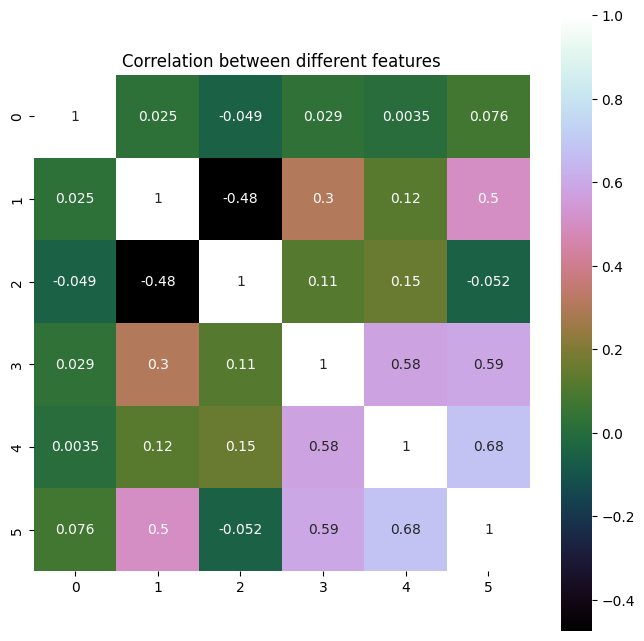

Eigenvectors:
 [[ 5.04595763e-02  9.47890492e-02 -9.92151190e-01 -6.02758211e-02
   2.14156630e-02  3.61642645e-03]
 [ 3.69786153e-01  5.62491406e-01  1.11026307e-01 -4.56689757e-01
   4.34832490e-01  3.69986417e-01]
 [-4.99924679e-02 -7.35803224e-01 -5.26445225e-02 -1.37782024e-01
   4.69791708e-01  4.62206434e-01]
 [ 5.15434359e-01 -1.86111454e-01  1.14053039e-02  7.52271900e-02
   4.66009187e-01 -6.90460842e-01]
 [ 5.04416636e-01 -3.13862878e-01  1.56666915e-02 -5.40678501e-01
  -5.95377880e-01  6.67003148e-04]
 [ 5.81467164e-01  8.04297795e-03 -1.27359168e-02  6.86166914e-01
  -1.34604767e-01  4.15602655e-01]]

Eigenvalues:
 [2.44496172 1.46444712 0.99537265 0.20155982 0.49267106 0.40192235]


In [ ]:
import seaborn as sns
# Compute mean vector
mean_vec = np.mean(df_std_numeric, axis=0)

# Compute covariance matrix
cov_mat = (df_std_numeric - mean_vec).T.dot((df_std_numeric - mean_vec)) / (df_std_numeric.shape[0] - 1)
print('Covariance matrix:\n', cov_mat)

# Alternatively, you can use np.cov
cov_mat_np = np.cov(df_std_numeric.T)
print('NumPy covariance matrix:\n', cov_mat_np)

# Check the correlation between different features
plt.figure(figsize=(8, 8))
sns.heatmap(cov_mat, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')
plt.show()

# Eigen decomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors:\n', eig_vecs)
print('\nEigenvalues:\n', eig_vals)


Eigenvalues in descending order:
2.444961722066361
1.4644471205409086
0.995372648224783
0.4926710614046507
0.40192235485326516
0.20155981794508646


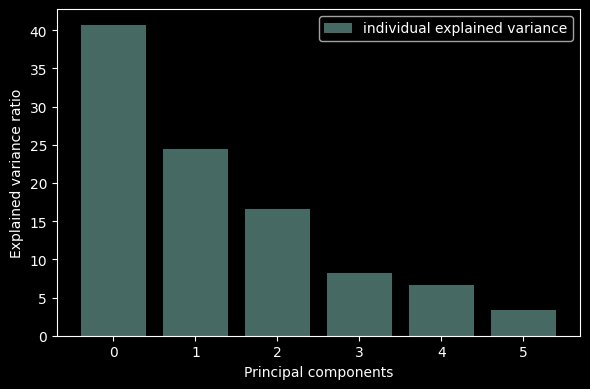

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Print eigenvalues in descending order
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

# Explained Variance
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]

# Plot explained variance ratio
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


In [ ]:
# Construct projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(-1, 1),
                      eig_pairs[1][1].reshape(-1, 1)))
print('Projection Matrix (W):\n', matrix_w)


# Projection onto the New Feature Space
Y = df_std_numeric.dot(matrix_w)
print('Projected Data (Y):\n', Y)
print('Shape of Projected Data (Y):', Y.shape)


Projection Matrix (W):
 [[ 0.05045958  0.09478905]
 [ 0.36978615  0.56249141]
 [-0.04999247 -0.73580322]
 [ 0.51543436 -0.18611145]
 [ 0.50441664 -0.31386288]
 [ 0.58146716  0.00804298]]
Projected Data (Y):
 [[-0.40126233 -1.95727323]
 [-0.42836557 -1.94862109]
 [-0.45901035 -1.93667408]
 ...
 [-1.59204214 -0.22024874]
 [-1.58835036 -0.19754602]
 [-1.59276098 -0.16402152]]
Shape of Projected Data (Y): (6420, 2)


# **Principal Component Analysis - Scikit-learn**

---



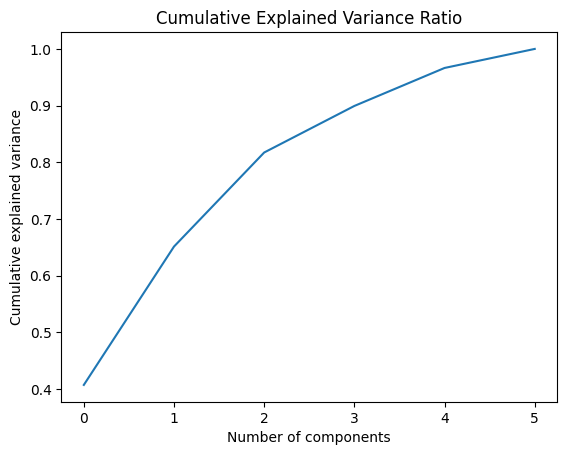

[[-0.40126233  1.95727323  1.48713633  0.27786455 -0.40565549]
 [-0.42836557  1.94862109  1.37100042  0.27035103 -0.42169418]
 [-0.45901035  1.93667408  1.25496526  0.26043938 -0.43303463]
 ...
 [-1.59204214  0.22024874 -1.60327166 -0.92528382 -0.47777927]
 [-1.58835036  0.19754602 -1.71689221 -0.92942962 -0.46425116]
 [-1.59276098  0.16402152 -1.82986019 -0.94312412 -0.44057839]]
Transformed data shape: (6420, 5)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA and fit to standardized data
pca = PCA().fit(df_std_numeric)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

# Perform PCA with specified number of components
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(df_std_numeric)

# Output transformed data
print(Y_sklearn)
print("Transformed data shape:", Y_sklearn.shape)


# **Conclusion and Inference**

---





#### Data Exploration:
- The dataset consists of information on mental illnesses prevalence across different countries and years.
- It contains a total of 6420 records and 8 columns.
- The columns include features such as the entity, country code, year, and various mental disorder prevalence rates.
- Initial exploration suggests that the dataset contains both numerical and categorical variables.

#### Univariate Analysis:
- Basic descriptive statistics and visualization techniques were used to understand the distribution of numerical variables.
- Histograms, kernel density plots, and box plots were utilized to visualize the distribution, central tendency, and spread of each numerical variable.
- Frequency tables and bar plots were used to analyze categorical variables, providing insights into the occurrence of different categories within each variable.

#### Bivariate Analysis:
- Scatter plots were used to visualize relationships between pairs of numerical variables, revealing potential correlations or patterns.
- Box plots and violin plots were used to compare the distribution of numerical variables across different categories, such as entities or country codes.
- A correlation heatmap was generated to explore the pairwise correlations between numerical variables.

#### Principal Component Analysis (PCA):
- PCA was performed using both conventional methods and scikit-learn.
- The conventional method involved computing the covariance matrix, eigen decomposition, and selection of principal components.
- Scikit-learn's PCA module was used to analyze the explained variance ratio and perform dimensionality reduction.
- The number of principal components required to capture 90% of the variance was determined.

#### Overall:
- The dataset provides valuable insights into the prevalence of mental illnesses across countries and years.
- Univariate and bivariate analyses helped understand the distribution and relationships between variables.
- PCA was utilized for dimensionality reduction and identifying key components contributing to the variance in the dataset.
- The cumulative explained variance ratio was visualized to determine the appropriate number of components for dimensionality reduction.

These analyses provide a comprehensive understanding of the dataset and can guide further exploration or modeling tasks related to mental health prevalence.